# 付録A5: 弱い紐帯の強さ（Strength of Weak Ties）

## 学習目標
- 弱い紐帯の強さ（Strength of Weak Ties）理論を理解する
- 強い紐帯と弱い紐帯の違いを学ぶ
- 橋渡し（ブリッジ）の概念とその重要性を理解する
- NetworkXを使って紐帯の強さを分析する

## 難易度: 中級

---
## A5.1 弱い紐帯の強さとは？

**弱い紐帯の強さ（Strength of Weak Ties）** は、1973年に社会学者マーク・グラノヴェッター（Mark Granovetter）が提唱した理論です。

### 核心的な主張

> **「新しい情報や機会は、親しい友人（強い紐帯）よりも、
> 知り合い程度の人（弱い紐帯）からもたらされることが多い」**

### グラノヴェッターの就職研究（1974年）

ボストン郊外の専門職・管理職の転職者を調査した結果：

| 紐帯の強さ | 就職情報の入手経路 |
|-----------|-------------------|
| 強い紐帯（親しい友人） | 16.7% |
| 弱い紐帯（知人程度） | **83.3%** |

### なぜ「弱い」紐帯が「強い」のか？

1. **情報の重複**: 親しい友人は同じ情報を持っていることが多い
2. **異なるサークルへのアクセス**: 弱い紐帯は異なる社会集団への「橋」になる
3. **新規性**: 弱い紐帯からの情報は自分が知らない可能性が高い

---
## A5.2 環境のセットアップ

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.rcParams['font.sans-serif'] = ['IPAexGothic'] + plt.rcParams['font.sans-serif']
%matplotlib inline

print(f"NetworkX version: {nx.__version__}")
print(f"NumPy version: {np.__version__}")

NetworkX version: 3.6.1
NumPy version: 2.3.5


---
## A5.3 紐帯の強さの定義

### グラノヴェッターによる定義

紐帯の強さは以下の要素の組み合わせで決まります：

1. **時間**: 一緒に過ごす時間の長さ
2. **感情的強度**: 親密さや信頼の度合い
3. **親密さ**: 相互の打ち明け話の深さ
4. **互恵性**: 助け合いの程度

### ネットワーク分析での操作的定義

実際のネットワーク分析では、以下の指標で紐帯の強さを推定します：

| 指標 | 説明 |
|------|------|
| 共通の友人数 | 2人が共有する友人の数 |
| Jaccard係数 | 共通友人数 / 全友人数 |
| 接触頻度 | コミュニケーションの回数（重み） |

In [2]:
# 紐帯の強さを計算する関数
def tie_strength_metrics(G, u, v):
    """
    2つのノード間の紐帯の強さに関する指標を計算
    
    Parameters:
    -----------
    G : networkx.Graph
        グラフ
    u, v : node
        2つのノード
    
    Returns:
    --------
    dict: 各種指標
    """
    neighbors_u = set(G.neighbors(u))
    neighbors_v = set(G.neighbors(v))
    
    # 共通の友人（u, v自身は除く）
    common = neighbors_u & neighbors_v - {u, v}
    
    # 全ての友人（和集合）
    total = neighbors_u | neighbors_v - {u, v}
    
    # Jaccard係数
    jaccard = len(common) / len(total) if len(total) > 0 else 0
    
    return {
        'common_neighbors': len(common),
        'total_neighbors': len(total),
        'jaccard': jaccard
    }

/tmp/ipykernel_3172/2220019695.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


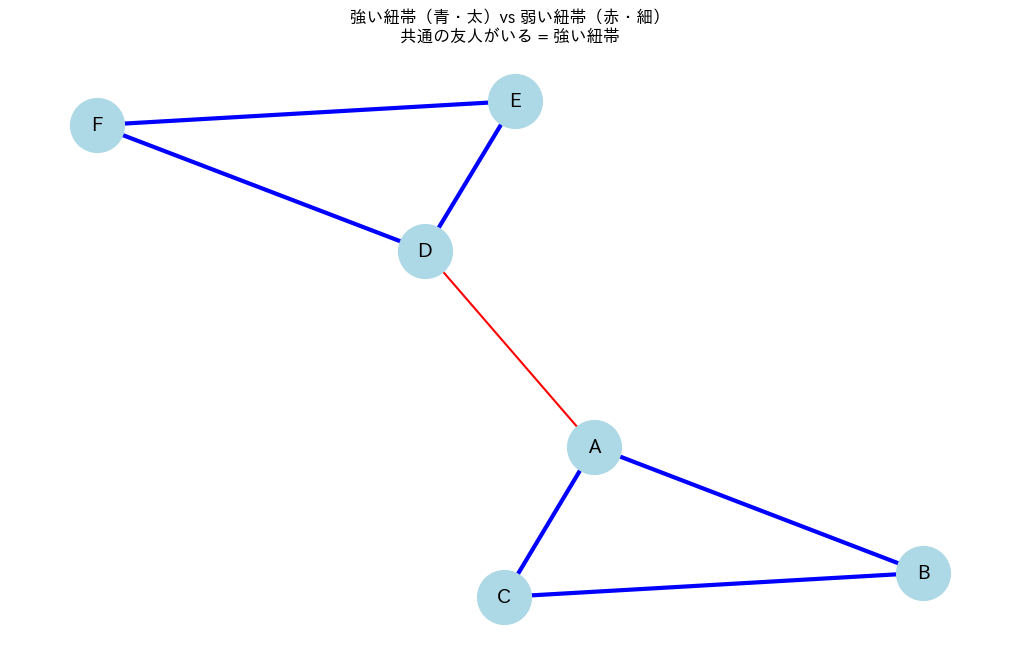

In [3]:
# 簡単な例で確認
G_example = nx.Graph()
# 強い紐帯のグループ（A, B, C - 全員が友人）
G_example.add_edges_from([('A', 'B'), ('B', 'C'), ('A', 'C')])
# 弱い紐帯（AとD - 共通の友人なし）
G_example.add_edge('A', 'D')
# Dの別のグループ
G_example.add_edges_from([('D', 'E'), ('E', 'F'), ('D', 'F')])

# 可視化
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G_example, seed=42)

# エッジを紐帯の強さで色分け
edge_colors = []
edge_widths = []
for u, v in G_example.edges():
    metrics = tie_strength_metrics(G_example, u, v)
    if metrics['common_neighbors'] >= 1:
        edge_colors.append('blue')
        edge_widths.append(3)
    else:
        edge_colors.append('red')
        edge_widths.append(1.5)

nx.draw(G_example, pos, with_labels=True, node_color='lightblue',
        node_size=1500, font_size=14, font_weight='bold',
        edge_color=edge_colors, width=edge_widths)

plt.title('強い紐帯（青・太）vs 弱い紐帯（赤・細）\n共通の友人がいる = 強い紐帯')
plt.tight_layout()
plt.show()

In [4]:
# 各エッジの紐帯の強さを表示
print("各エッジの紐帯の強さ")
print("=" * 60)

for u, v in G_example.edges():
    metrics = tie_strength_metrics(G_example, u, v)
    tie_type = "強い紐帯" if metrics['common_neighbors'] >= 1 else "弱い紐帯"
    print(f"{u} -- {v}: 共通友人={metrics['common_neighbors']}, "
          f"Jaccard={metrics['jaccard']:.2f} → {tie_type}")

各エッジの紐帯の強さ
A -- B: 共通友人=1, Jaccard=0.33 → 強い紐帯
A -- C: 共通友人=1, Jaccard=0.33 → 強い紐帯
A -- D: 共通友人=0, Jaccard=0.00 → 弱い紐帯
B -- C: 共通友人=1, Jaccard=0.50 → 強い紐帯
D -- E: 共通友人=1, Jaccard=0.33 → 強い紐帯
D -- F: 共通友人=1, Jaccard=0.33 → 強い紐帯
E -- F: 共通友人=1, Jaccard=0.50 → 強い紐帯


---
## A5.4 橋渡し（ブリッジ）の概念

### 定義

**橋渡し（Bridge）**: そのエッジを削除するとグラフが非連結になるエッジ

**局所的橋渡し（Local Bridge）**: 2つのノード間の最短経路がそのエッジのみであるエッジ

### グラノヴェッターの重要な洞察

> **「弱い紐帯は、多くの場合、局所的橋渡しである」**

つまり、弱い紐帯を削除すると、異なるコミュニティ間のつながりが失われます。

In [5]:
def find_bridges(G):
    """グラフ内の橋渡しエッジを見つける"""
    return list(nx.bridges(G))

def find_local_bridges(G):
    """
    局所的橋渡しを見つける
    局所的橋渡し: そのエッジを除いた場合、両端点間の最短距離が3以上になるエッジ
    """
    local_bridges = []
    for u, v in G.edges():
        # エッジを一時的に削除
        G.remove_edge(u, v)
        try:
            # 最短経路長を計算
            length = nx.shortest_path_length(G, u, v)
            if length >= 3:  # 距離3以上なら局所的橋渡し
                local_bridges.append((u, v, length))
        except nx.NetworkXNoPath:
            # パスがない = 真の橋渡し
            local_bridges.append((u, v, float('inf')))
        # エッジを元に戻す
        G.add_edge(u, v)
    return local_bridges

In [6]:
# 例のグラフで橋渡しを検出
bridges = find_bridges(G_example)
local_bridges = find_local_bridges(G_example)

print("橋渡し（Bridge）:")
for bridge in bridges:
    print(f"  {bridge[0]} -- {bridge[1]}")

print("\n局所的橋渡し（Local Bridge）:")
for u, v, span in local_bridges:
    span_str = "∞（非連結）" if span == float('inf') else str(span)
    print(f"  {u} -- {v} (削除時の距離: {span_str})")

橋渡し（Bridge）:
  A -- D

局所的橋渡し（Local Bridge）:
  A -- D (削除時の距離: ∞（非連結）)


/tmp/ipykernel_3172/2890800601.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


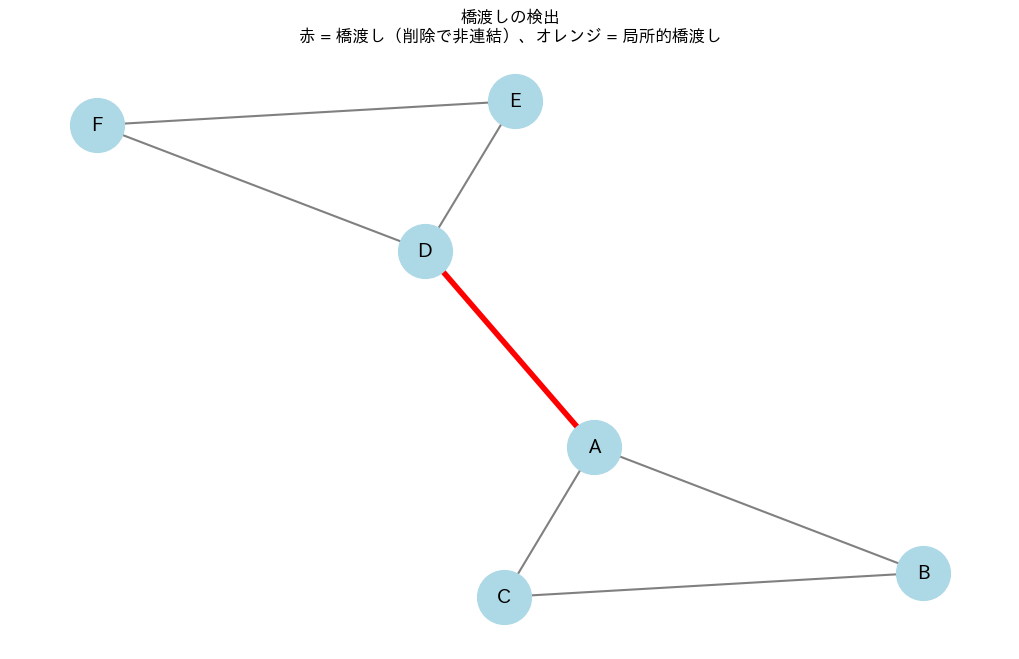

In [7]:
# 橋渡しを強調した可視化
plt.figure(figsize=(10, 6))

# エッジの色と太さを設定
edge_colors = []
edge_widths = []
bridge_set = set(bridges)
local_bridge_set = set((u, v) for u, v, _ in local_bridges)

for u, v in G_example.edges():
    if (u, v) in bridge_set or (v, u) in bridge_set:
        edge_colors.append('red')
        edge_widths.append(4)
    elif (u, v) in local_bridge_set or (v, u) in local_bridge_set:
        edge_colors.append('orange')
        edge_widths.append(3)
    else:
        edge_colors.append('gray')
        edge_widths.append(1.5)

nx.draw(G_example, pos, with_labels=True, node_color='lightblue',
        node_size=1500, font_size=14, font_weight='bold',
        edge_color=edge_colors, width=edge_widths)

plt.title('橋渡しの検出\n赤 = 橋渡し（削除で非連結）、オレンジ = 局所的橋渡し')
plt.tight_layout()
plt.show()

---
## A5.5 ステップ1: コミュニティ構造と弱い紐帯

より現実的なネットワークで、コミュニティ間をつなぐ弱い紐帯の役割を見てみましょう。

In [8]:
def create_community_network(n_communities=3, nodes_per_community=20, 
                             p_intra=0.4, p_inter=0.02, seed=42):
    """
    コミュニティ構造を持つネットワークを生成
    
    Parameters:
    -----------
    n_communities : int
        コミュニティ数
    nodes_per_community : int
        各コミュニティのノード数
    p_intra : float
        コミュニティ内接続確率（強い紐帯）
    p_inter : float
        コミュニティ間接続確率（弱い紐帯）
    """
    np.random.seed(seed)
    
    # 確率行列を作成
    sizes = [nodes_per_community] * n_communities
    probs = np.full((n_communities, n_communities), p_inter)
    np.fill_diagonal(probs, p_intra)
    
    # Stochastic Block Modelで生成
    G = nx.stochastic_block_model(sizes, probs, seed=seed)
    
    # コミュニティ情報を保存
    community_map = {}
    node_idx = 0
    for comm_id in range(n_communities):
        for _ in range(nodes_per_community):
            community_map[node_idx] = comm_id
            node_idx += 1
    
    nx.set_node_attributes(G, community_map, 'community')
    
    return G

# ネットワーク生成
G_comm = create_community_network(n_communities=3, nodes_per_community=25,
                                  p_intra=0.4, p_inter=0.03, seed=42)

print(f"ノード数: {G_comm.number_of_nodes()}")
print(f"エッジ数: {G_comm.number_of_edges()}")

ノード数: 75
エッジ数: 394


In [9]:
# エッジをコミュニティ内/間で分類
def classify_edges(G):
    """エッジをコミュニティ内（強い紐帯）とコミュニティ間（弱い紐帯）に分類"""
    intra_edges = []  # コミュニティ内
    inter_edges = []  # コミュニティ間
    
    communities = nx.get_node_attributes(G, 'community')
    
    for u, v in G.edges():
        if communities[u] == communities[v]:
            intra_edges.append((u, v))
        else:
            inter_edges.append((u, v))
    
    return intra_edges, inter_edges

intra_edges, inter_edges = classify_edges(G_comm)

print(f"コミュニティ内エッジ（強い紐帯）: {len(intra_edges)}")
print(f"コミュニティ間エッジ（弱い紐帯）: {len(inter_edges)}")
print(f"弱い紐帯の割合: {len(inter_edges) / G_comm.number_of_edges():.1%}")

コミュニティ内エッジ（強い紐帯）: 335
コミュニティ間エッジ（弱い紐帯）: 59
弱い紐帯の割合: 15.0%


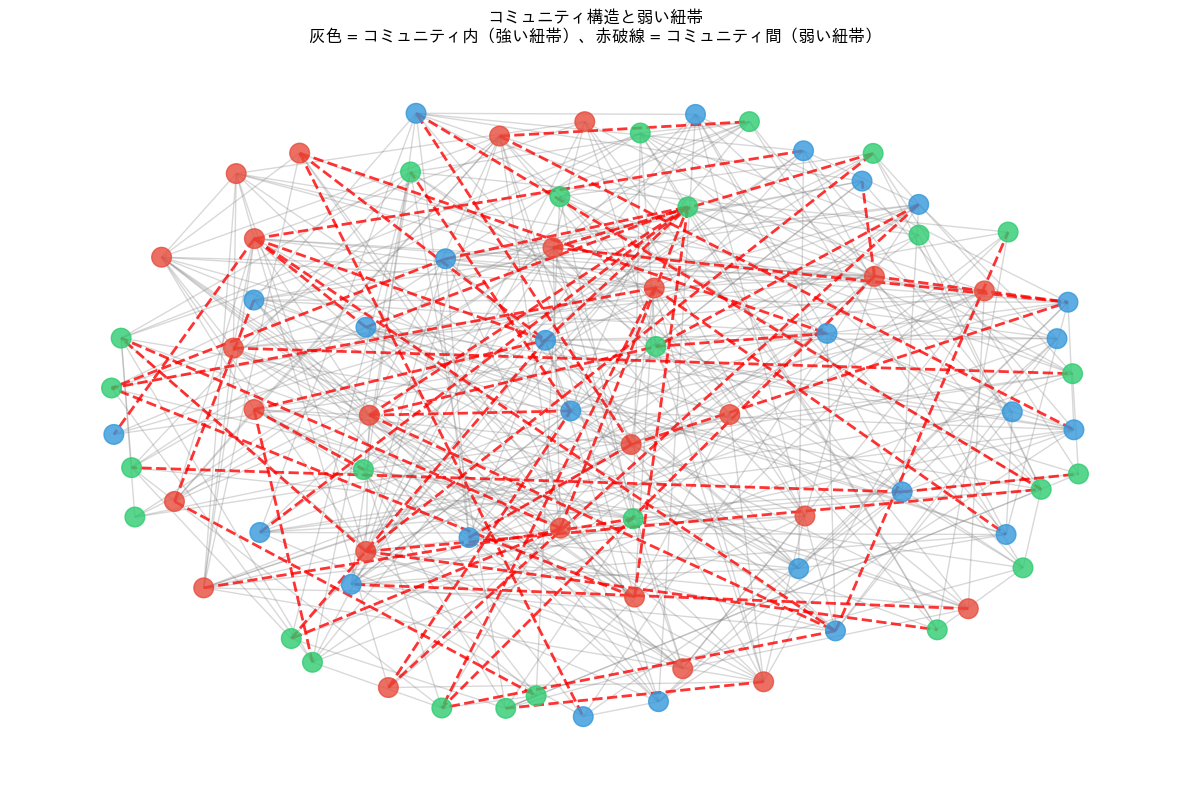

In [10]:
# 可視化
plt.figure(figsize=(12, 8))

# ノードの色をコミュニティで分ける
communities = nx.get_node_attributes(G_comm, 'community')
colors = ['#e74c3c', '#3498db', '#2ecc71']  # 赤、青、緑
node_colors = [colors[communities[n]] for n in G_comm.nodes()]

# レイアウト
pos = nx.spring_layout(G_comm, seed=42, k=2)

# コミュニティ内エッジ（薄く）
nx.draw_networkx_edges(G_comm, pos, edgelist=intra_edges, 
                       edge_color='gray', alpha=0.3, width=1)

# コミュニティ間エッジ（目立つように）
nx.draw_networkx_edges(G_comm, pos, edgelist=inter_edges,
                       edge_color='red', alpha=0.8, width=2, style='dashed')

# ノード
nx.draw_networkx_nodes(G_comm, pos, node_color=node_colors, 
                       node_size=200, alpha=0.8)

plt.title('コミュニティ構造と弱い紐帯\n灰色 = コミュニティ内（強い紐帯）、赤破線 = コミュニティ間（弱い紐帯）')
plt.axis('off')
plt.tight_layout()
plt.show()

---
## A5.6 ステップ2: 弱い紐帯の情報伝播における役割

シミュレーションで、弱い紐帯が情報拡散にどれほど重要かを検証します。

In [11]:
def simulate_information_spread(G, start_node, max_steps=50):
    """
    情報拡散シミュレーション（単純な伝染モデル）
    
    各ステップで、情報を持つノードが隣接ノードに確率1で伝播
    
    Returns:
    --------
    list: 各ステップでの情報を持つノードの割合
    """
    informed = {start_node}
    history = [len(informed) / G.number_of_nodes()]
    
    for _ in range(max_steps):
        new_informed = set()
        for node in informed:
            new_informed.update(G.neighbors(node))
        
        if new_informed == informed:
            # これ以上広がらない
            break
        
        informed = new_informed | informed
        history.append(len(informed) / G.number_of_nodes())
    
    return history

# 元のグラフでの情報拡散
start_node = 0  # コミュニティ0のノードからスタート
spread_original = simulate_information_spread(G_comm, start_node)

print(f"元のグラフ: {len(spread_original)-1}ステップで全体の{spread_original[-1]:.1%}に到達")

元のグラフ: 3ステップで全体の100.0%に到達


In [12]:
# 弱い紐帯を削除したグラフでの情報拡散
G_no_weak = G_comm.copy()
G_no_weak.remove_edges_from(inter_edges)

# 連結成分を確認
components = list(nx.connected_components(G_no_weak))
print(f"弱い紐帯削除後の連結成分数: {len(components)}")

# 情報拡散（同じ開始ノード）
spread_no_weak = simulate_information_spread(G_no_weak, start_node)

print(f"弱い紐帯なし: {len(spread_no_weak)-1}ステップで全体の{spread_no_weak[-1]:.1%}に到達")

弱い紐帯削除後の連結成分数: 3
弱い紐帯なし: 2ステップで全体の33.3%に到達


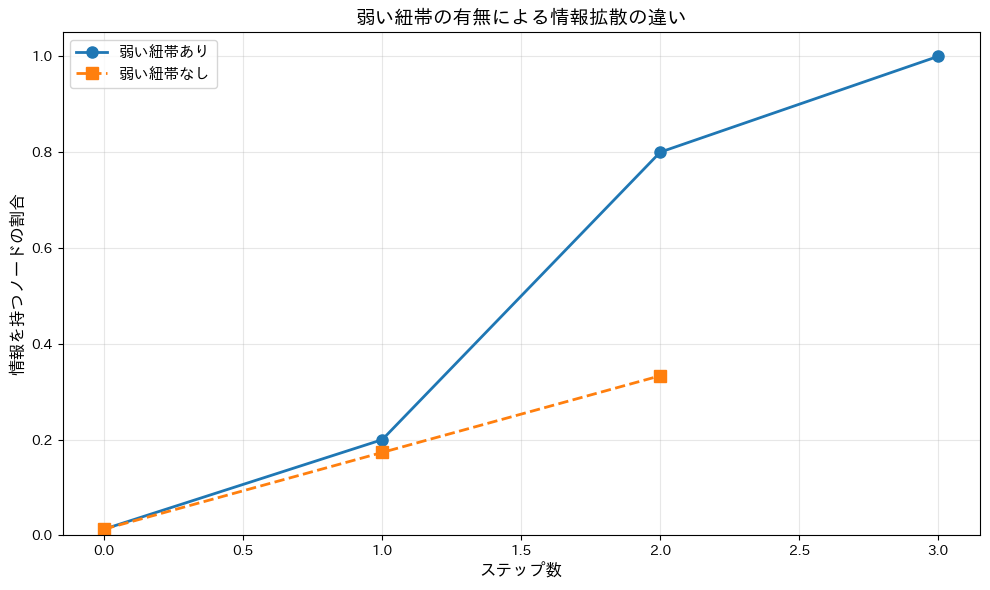


弱い紐帯がないと、情報は自分のコミュニティ内（約33%）にしか広がらない！


In [13]:
# 比較グラフ
plt.figure(figsize=(10, 6))

plt.plot(spread_original, 'o-', label='弱い紐帯あり', linewidth=2, markersize=8)
plt.plot(spread_no_weak, 's--', label='弱い紐帯なし', linewidth=2, markersize=8)

plt.xlabel('ステップ数', fontsize=12)
plt.ylabel('情報を持つノードの割合', fontsize=12)
plt.title('弱い紐帯の有無による情報拡散の違い', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

print(f"\n弱い紐帯がないと、情報は自分のコミュニティ内（約{1/3:.0%}）にしか広がらない！")

---
## A5.7 ステップ3: 媒介中心性と弱い紐帯

弱い紐帯を持つノードは、情報の「仲介者」として高い媒介中心性を持つ傾向があります。

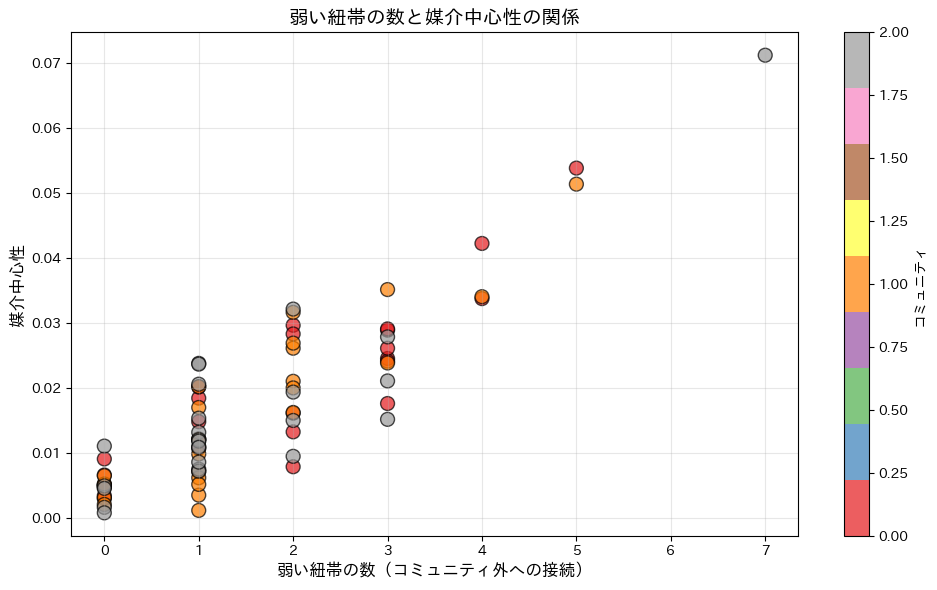

相関係数: 0.891


In [14]:
# 媒介中心性を計算
betweenness = nx.betweenness_centrality(G_comm)

# 各ノードが持つ弱い紐帯（コミュニティ間エッジ）の数を計算
communities = nx.get_node_attributes(G_comm, 'community')
weak_tie_count = {}

for node in G_comm.nodes():
    count = 0
    for neighbor in G_comm.neighbors(node):
        if communities[node] != communities[neighbor]:
            count += 1
    weak_tie_count[node] = count

# 相関を可視化
plt.figure(figsize=(10, 6))

x = [weak_tie_count[n] for n in G_comm.nodes()]
y = [betweenness[n] for n in G_comm.nodes()]
colors = [communities[n] for n in G_comm.nodes()]

scatter = plt.scatter(x, y, c=colors, cmap='Set1', s=100, alpha=0.7, edgecolors='black')

plt.xlabel('弱い紐帯の数（コミュニティ外への接続）', fontsize=12)
plt.ylabel('媒介中心性', fontsize=12)
plt.title('弱い紐帯の数と媒介中心性の関係', fontsize=14)
plt.colorbar(scatter, label='コミュニティ')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 相関係数
correlation = np.corrcoef(x, y)[0, 1]
print(f"相関係数: {correlation:.3f}")

In [15]:
# 媒介中心性上位のノードを特定
top_brokers = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]

print("媒介中心性上位5ノード（情報の仲介者）")
print("=" * 60)
for node, bc in top_brokers:
    print(f"ノード {node}: 媒介中心性={bc:.4f}, "
          f"弱い紐帯数={weak_tie_count[node]}, "
          f"コミュニティ={communities[node]}")

媒介中心性上位5ノード（情報の仲介者）
ノード 57: 媒介中心性=0.0712, 弱い紐帯数=7, コミュニティ=2
ノード 21: 媒介中心性=0.0538, 弱い紐帯数=5, コミュニティ=0
ノード 32: 媒介中心性=0.0514, 弱い紐帯数=5, コミュニティ=1
ノード 2: 媒介中心性=0.0422, 弱い紐帯数=4, コミュニティ=0
ノード 42: 媒介中心性=0.0351, 弱い紐帯数=3, コミュニティ=1


---
## A5.8 ステップ4: エッジ媒介中心性による弱い紐帯の検出

エッジの媒介中心性を使うと、コミュニティ構造を知らなくても弱い紐帯を検出できます。

In [16]:
# エッジ媒介中心性を計算
edge_betweenness = nx.edge_betweenness_centrality(G_comm)

# コミュニティ内/間でグループ化
eb_intra = [edge_betweenness[e] for e in intra_edges if e in edge_betweenness]
eb_inter = [edge_betweenness[e] for e in inter_edges if e in edge_betweenness]

# 逆順（v, u）も確認
eb_intra += [edge_betweenness[(v, u)] for u, v in intra_edges if (v, u) in edge_betweenness]
eb_inter += [edge_betweenness[(v, u)] for u, v in inter_edges if (v, u) in edge_betweenness]

print("エッジ媒介中心性の比較")
print("=" * 50)
print(f"コミュニティ内（強い紐帯）: 平均 {np.mean(eb_intra):.4f}")
print(f"コミュニティ間（弱い紐帯）: 平均 {np.mean(eb_inter):.4f}")
print(f"\n弱い紐帯は強い紐帯の {np.mean(eb_inter)/np.mean(eb_intra):.1f}倍 の媒介中心性を持つ")

エッジ媒介中心性の比較
コミュニティ内（強い紐帯）: 平均 0.0045
コミュニティ間（弱い紐帯）: 平均 0.0127

弱い紐帯は強い紐帯の 2.8倍 の媒介中心性を持つ


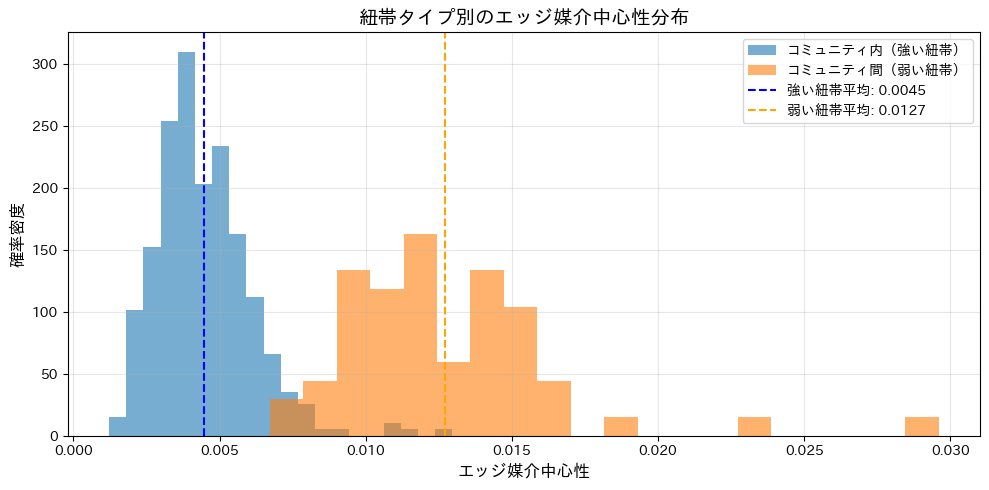

In [17]:
# 分布の比較
plt.figure(figsize=(10, 5))

plt.hist(eb_intra, bins=20, alpha=0.6, label='コミュニティ内（強い紐帯）', density=True)
plt.hist(eb_inter, bins=20, alpha=0.6, label='コミュニティ間（弱い紐帯）', density=True)

plt.axvline(np.mean(eb_intra), color='blue', linestyle='--', 
            label=f'強い紐帯平均: {np.mean(eb_intra):.4f}')
plt.axvline(np.mean(eb_inter), color='orange', linestyle='--',
            label=f'弱い紐帯平均: {np.mean(eb_inter):.4f}')

plt.xlabel('エッジ媒介中心性', fontsize=12)
plt.ylabel('確率密度', fontsize=12)
plt.title('紐帯タイプ別のエッジ媒介中心性分布', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
## A5.9 ステップ5: 就職活動シミュレーション

グラノヴェッターの研究を再現するシミュレーションを行います。

In [18]:
def job_search_simulation(G, n_simulations=1000, seed=42):
    """
    就職活動シミュレーション
    
    - 各ノードに「求人情報を持っている」確率を設定
    - ランダムな求職者が、繋がりを通じて求人情報を探す
    - 情報を得た経路が強い紐帯か弱い紐帯かを記録
    """
    np.random.seed(seed)
    communities = nx.get_node_attributes(G, 'community')
    nodes = list(G.nodes())
    
    # 結果を記録
    results = {'strong': 0, 'weak': 0, 'none': 0}
    
    for _ in range(n_simulations):
        # 求職者をランダムに選択
        seeker = np.random.choice(nodes)
        seeker_comm = communities[seeker]
        
        # 求人情報を持つノードをランダムに選択（求職者以外）
        job_holder = np.random.choice([n for n in nodes if n != seeker])
        
        # 求職者が求人情報にアクセスできるか？
        # → 1次の繋がり（直接の知り合い）で到達できるかをチェック
        neighbors = set(G.neighbors(seeker))
        
        if job_holder in neighbors:
            # 直接繋がっている
            if communities[job_holder] == seeker_comm:
                results['strong'] += 1
            else:
                results['weak'] += 1
        else:
            # 2次の繋がりを確認
            found = False
            found_via_strong = False
            found_via_weak = False
            
            for neighbor in neighbors:
                if job_holder in G.neighbors(neighbor):
                    found = True
                    if communities[neighbor] == seeker_comm:
                        found_via_strong = True
                    else:
                        found_via_weak = True
            
            if found_via_weak:
                results['weak'] += 1
            elif found_via_strong:
                results['strong'] += 1
            else:
                results['none'] += 1
    
    return results

# シミュレーション実行
job_results = job_search_simulation(G_comm, n_simulations=5000, seed=42)

# 「情報を得た」ケースでの割合
found_total = job_results['strong'] + job_results['weak']
strong_rate = job_results['strong'] / found_total if found_total > 0 else 0
weak_rate = job_results['weak'] / found_total if found_total > 0 else 0

print("就職活動シミュレーション結果")
print("=" * 50)
print(f"総シミュレーション数: {sum(job_results.values())}")
print(f"情報を得られた: {found_total} ({found_total/sum(job_results.values()):.1%})")
print(f"  - 強い紐帯経由: {job_results['strong']} ({strong_rate:.1%})")
print(f"  - 弱い紐帯経由: {job_results['weak']} ({weak_rate:.1%})")
print(f"情報を得られなかった: {job_results['none']}")

就職活動シミュレーション結果
総シミュレーション数: 5000
情報を得られた: 3127 (62.5%)
  - 強い紐帯経由: 2090 (66.8%)
  - 弱い紐帯経由: 1037 (33.2%)
情報を得られなかった: 1873


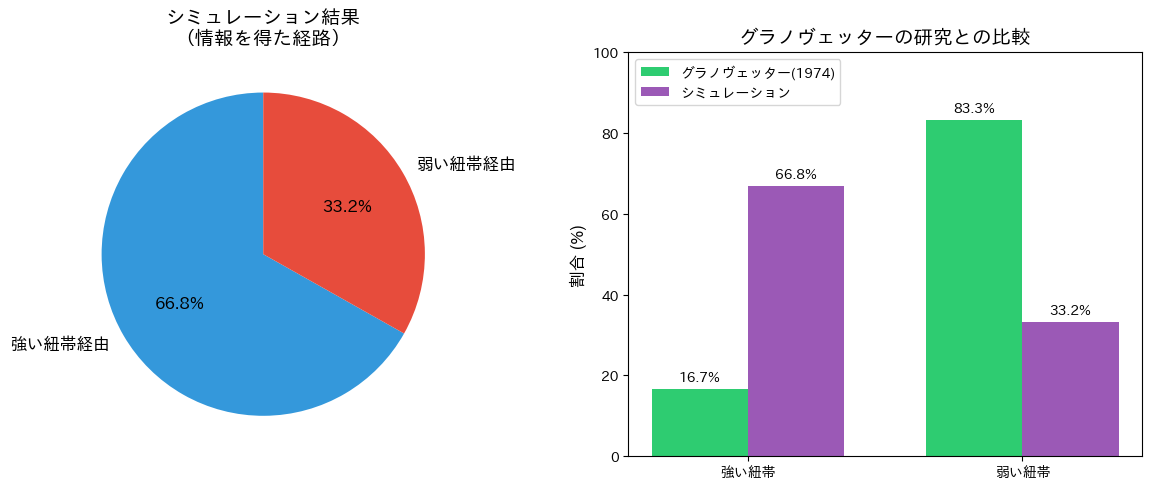

In [19]:
# 結果を可視化
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 左: シミュレーション結果
ax1 = axes[0]
labels = ['強い紐帯経由', '弱い紐帯経由']
sizes = [job_results['strong'], job_results['weak']]
colors = ['#3498db', '#e74c3c']
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90,
        textprops={'fontsize': 12})
ax1.set_title('シミュレーション結果\n（情報を得た経路）', fontsize=14)

# 右: グラノヴェッターの研究との比較
ax2 = axes[1]
x = np.arange(2)
width = 0.35

granovetter = [16.7, 83.3]  # グラノヴェッターの研究結果
simulation = [strong_rate * 100, weak_rate * 100]

bars1 = ax2.bar(x - width/2, granovetter, width, label='グラノヴェッター(1974)', color='#2ecc71')
bars2 = ax2.bar(x + width/2, simulation, width, label='シミュレーション', color='#9b59b6')

ax2.set_ylabel('割合 (%)', fontsize=12)
ax2.set_title('グラノヴェッターの研究との比較', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(['強い紐帯', '弱い紐帯'])
ax2.legend()
ax2.set_ylim(0, 100)

# 値をバーの上に表示
for bar, val in zip(bars1, granovetter):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
             f'{val:.1f}%', ha='center', fontsize=10)
for bar, val in zip(bars2, simulation):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{val:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

---
## A5.10 重み付きネットワークでの紐帯分析

実際のネットワークでは、接触頻度などの重みで紐帯の強さを表すことが多いです。

In [20]:
# 重み付きネットワークを生成
np.random.seed(42)

G_weighted = G_comm.copy()
communities = nx.get_node_attributes(G_weighted, 'community')

# 各エッジに重み（接触頻度）を割り当て
for u, v in G_weighted.edges():
    if communities[u] == communities[v]:
        # コミュニティ内: 高い頻度（強い紐帯）
        weight = np.random.exponential(5) + 3  # 平均8、最低3
    else:
        # コミュニティ間: 低い頻度（弱い紐帯）
        weight = np.random.exponential(1) + 0.5  # 平均1.5、最低0.5
    G_weighted[u][v]['weight'] = weight

# 重みの分布を確認
weights_intra = [G_weighted[u][v]['weight'] for u, v in intra_edges]
weights_inter = [G_weighted[u][v]['weight'] for u, v in inter_edges]

print("エッジの重み（接触頻度）")
print("=" * 50)
print(f"コミュニティ内（強い紐帯）: 平均 {np.mean(weights_intra):.2f}")
print(f"コミュニティ間（弱い紐帯）: 平均 {np.mean(weights_inter):.2f}")

エッジの重み（接触頻度）
コミュニティ内（強い紐帯）: 平均 7.89
コミュニティ間（弱い紐帯）: 平均 1.37


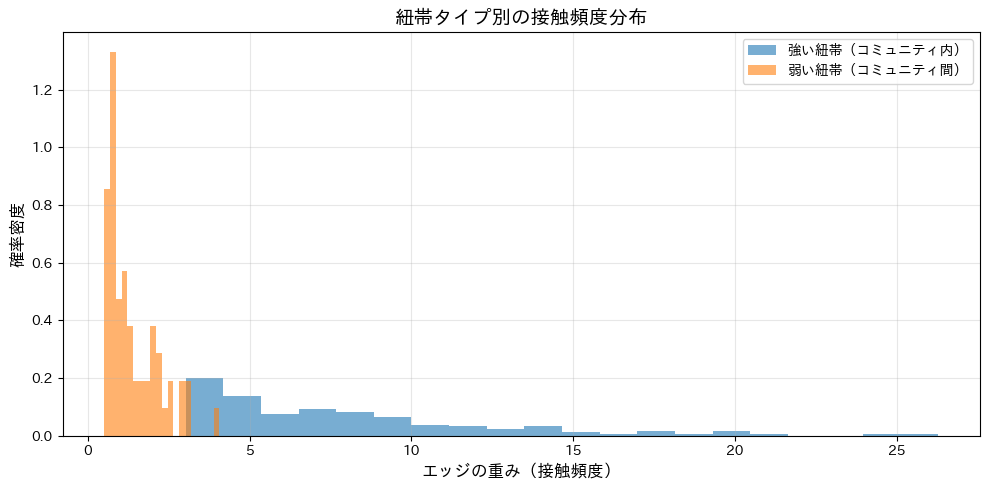

In [21]:
# 重みの分布を可視化
plt.figure(figsize=(10, 5))

plt.hist(weights_intra, bins=20, alpha=0.6, label='強い紐帯（コミュニティ内）', density=True)
plt.hist(weights_inter, bins=20, alpha=0.6, label='弱い紐帯（コミュニティ間）', density=True)

plt.xlabel('エッジの重み（接触頻度）', fontsize=12)
plt.ylabel('確率密度', fontsize=12)
plt.title('紐帯タイプ別の接触頻度分布', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [22]:
# 重みに基づく紐帯の強さと橋渡し性の関係
# 閾値以下の重みを「弱い紐帯」とみなす

all_weights = [G_weighted[u][v]['weight'] for u, v in G_weighted.edges()]
threshold = np.median(all_weights)  # 中央値を閾値に

weak_ties_by_weight = [(u, v) for u, v in G_weighted.edges() 
                       if G_weighted[u][v]['weight'] < threshold]
strong_ties_by_weight = [(u, v) for u, v in G_weighted.edges() 
                         if G_weighted[u][v]['weight'] >= threshold]

# エッジ媒介中心性との関係
eb = nx.edge_betweenness_centrality(G_weighted)

eb_weak = [eb.get((u, v), eb.get((v, u), 0)) for u, v in weak_ties_by_weight]
eb_strong = [eb.get((u, v), eb.get((v, u), 0)) for u, v in strong_ties_by_weight]

print(f"重み閾値: {threshold:.2f}")
print(f"弱い紐帯（重み < 閾値）: {len(weak_ties_by_weight)}本")
print(f"強い紐帯（重み >= 閾値）: {len(strong_ties_by_weight)}本")
print(f"\n弱い紐帯の平均媒介中心性: {np.mean(eb_weak):.4f}")
print(f"強い紐帯の平均媒介中心性: {np.mean(eb_strong):.4f}")

重み閾値: 5.52
弱い紐帯（重み < 閾値）: 197本
強い紐帯（重み >= 閾値）: 197本

弱い紐帯の平均媒介中心性: 0.0070
強い紐帯の平均媒介中心性: 0.0044


---
## 練習問題

### 練習問題1: 共通友人数による紐帯分類

Karate Clubネットワーク（`nx.karate_club_graph()`）を使って、各エッジの共通友人数を計算し、共通友人数が0のエッジ（弱い紐帯候補）を特定してください。

In [23]:
# ここにコードを記述してください


<details>
<summary>解答を見る</summary>

```python
G_karate = nx.karate_club_graph()

# 各エッジの共通友人数を計算
edge_common = []
for u, v in G_karate.edges():
    common = len(set(G_karate.neighbors(u)) & set(G_karate.neighbors(v)))
    edge_common.append((u, v, common))

# 共通友人数0のエッジ（弱い紐帯候補）
weak_candidates = [(u, v) for u, v, c in edge_common if c == 0]

print(f"総エッジ数: {G_karate.number_of_edges()}")
print(f"共通友人数0のエッジ: {len(weak_candidates)}")
print(f"\n弱い紐帯候補:")
for u, v in weak_candidates[:10]:
    print(f"  {u} -- {v}")

# 可視化
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_karate, seed=42)

# 通常のエッジ
normal_edges = [(u, v) for u, v, c in edge_common if c > 0]
nx.draw_networkx_edges(G_karate, pos, edgelist=normal_edges, alpha=0.3)

# 弱い紐帯候補
nx.draw_networkx_edges(G_karate, pos, edgelist=weak_candidates,
                       edge_color='red', width=2)

nx.draw_networkx_nodes(G_karate, pos, node_color='lightblue', node_size=300)
nx.draw_networkx_labels(G_karate, pos, font_size=8)

plt.title('Karate Clubの弱い紐帯候補（赤）')
plt.axis('off')
plt.show()
```
</details>

### 練習問題2: 橋渡しノードの特定

コミュニティ構造を持つネットワークを生成し、複数のコミュニティと接続を持つ「橋渡しノード」を特定してください。橋渡しノードの媒介中心性は他のノードと比べてどうなっていますか？

In [24]:
# ここにコードを記述してください


<details>
<summary>解答を見る</summary>

```python
# コミュニティネットワークを使用
G = create_community_network(n_communities=4, nodes_per_community=20,
                             p_intra=0.4, p_inter=0.05, seed=123)

communities = nx.get_node_attributes(G, 'community')

# 各ノードが接続しているコミュニティを調べる
def get_connected_communities(G, node, communities):
    neighbor_comms = set()
    for neighbor in G.neighbors(node):
        neighbor_comms.add(communities[neighbor])
    return neighbor_comms

# 橋渡しノード（2つ以上のコミュニティと接続）を特定
bridge_nodes = []
for node in G.nodes():
    connected_comms = get_connected_communities(G, node, communities)
    if len(connected_comms) >= 2:
        bridge_nodes.append(node)

print(f"総ノード数: {G.number_of_nodes()}")
print(f"橋渡しノード数: {len(bridge_nodes)}")

# 媒介中心性を計算
betweenness = nx.betweenness_centrality(G)

bc_bridges = [betweenness[n] for n in bridge_nodes]
bc_others = [betweenness[n] for n in G.nodes() if n not in bridge_nodes]

print(f"\n橋渡しノードの平均媒介中心性: {np.mean(bc_bridges):.4f}")
print(f"その他ノードの平均媒介中心性: {np.mean(bc_others):.4f}")
print(f"橋渡しノードは約{np.mean(bc_bridges)/np.mean(bc_others):.1f}倍の媒介中心性")

# 可視化
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42, k=2)

colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']
node_colors = [colors[communities[n]] for n in G.nodes()]

# 橋渡しノードを強調
node_sizes = [500 if n in bridge_nodes else 150 for n in G.nodes()]

nx.draw(G, pos, node_color=node_colors, node_size=node_sizes,
        edge_color='gray', alpha=0.7, width=0.5)

plt.title('橋渡しノード（大きいノード）\n複数コミュニティと接続を持つ')
plt.axis('off')
plt.show()
```
</details>

### 練習問題3: 情報多様性の分析

ノードが持つ「情報の多様性」を、接続先のコミュニティの多様性（エントロピー）で測定してください。弱い紐帯を多く持つノードほど情報多様性が高いことを確認してください。

In [25]:
# ここにコードを記述してください


<details>
<summary>解答を見る</summary>

```python
from collections import Counter

def information_diversity(G, node, communities):
    """接続先コミュニティの多様性（エントロピー）を計算"""
    neighbor_comms = [communities[n] for n in G.neighbors(node)]
    if len(neighbor_comms) == 0:
        return 0
    
    # 各コミュニティの割合を計算
    comm_counts = Counter(neighbor_comms)
    total = len(neighbor_comms)
    probs = [count / total for count in comm_counts.values()]
    
    # エントロピーを計算
    entropy = -sum(p * np.log2(p) for p in probs if p > 0)
    return entropy

# 各ノードの情報多様性と弱い紐帯数を計算
G = create_community_network(n_communities=4, nodes_per_community=25,
                             p_intra=0.4, p_inter=0.04, seed=42)
communities = nx.get_node_attributes(G, 'community')

diversity = {}
weak_tie_count = {}

for node in G.nodes():
    diversity[node] = information_diversity(G, node, communities)
    # 弱い紐帯数（異なるコミュニティへの接続）
    weak_count = sum(1 for n in G.neighbors(node) 
                     if communities[n] != communities[node])
    weak_tie_count[node] = weak_count

# 相関を可視化
plt.figure(figsize=(10, 6))

x = [weak_tie_count[n] for n in G.nodes()]
y = [diversity[n] for n in G.nodes()]

plt.scatter(x, y, alpha=0.6, s=80)

# 回帰直線
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
x_line = np.linspace(min(x), max(x), 100)
plt.plot(x_line, p(x_line), 'r--', label=f'回帰直線')

plt.xlabel('弱い紐帯の数', fontsize=12)
plt.ylabel('情報多様性（エントロピー）', fontsize=12)
plt.title('弱い紐帯数と情報多様性の関係', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

correlation = np.corrcoef(x, y)[0, 1]
print(f"相関係数: {correlation:.3f}")
print(f"弱い紐帯を多く持つノードほど情報多様性が高い傾向がある")
```
</details>

---
## A5.11 章のまとめ

この付録では以下を学びました：

1. **弱い紐帯の強さ理論**: グラノヴェッターの洞察と就職研究
2. **紐帯の強さの定義**: 共通友人数、Jaccard係数、接触頻度
3. **橋渡しの概念**: 異なるコミュニティをつなぐエッジの重要性
4. **情報伝播**: 弱い紐帯がないと情報は閉じたコミュニティ内に留まる
5. **媒介中心性**: 弱い紐帯を持つノード/エッジは高い媒介中心性を持つ

### 実社会への示唆

- **就職活動**: 親しい友人より広い知人ネットワークが有効
- **イノベーション**: 異分野との「弱いつながり」が新しいアイデアを生む
- **情報拡散**: SNSでの「薄い繋がり」がバイラルを可能にする

### 注意点

- 弱い紐帯は「新しい情報」には強いが、「信頼」「支援」には強い紐帯が重要
- 両方のバランスが社会的に健全

---
## 参考資料

- Granovetter, M. S. (1973). The Strength of Weak Ties. American Journal of Sociology.
- Granovetter, M. S. (1974). Getting a Job: A Study of Contacts and Careers.
- Burt, R. S. (1992). Structural Holes: The Social Structure of Competition.
- [NetworkX公式ドキュメント](https://networkx.org/documentation/stable/)
- [The Strength of Weak Ties - Wikipedia](https://en.wikipedia.org/wiki/The_Strength_of_Weak_Ties)